In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import time
import os

from pylab import rcParams
rcParams['figure.figsize'] = 5, 10


def get_ir_image(save_path="/tmp/ir.png"):
    # save to png to preserve the 16 bit depth of IR image
    # !gst-launch-1.0 v4l2src device=/dev/video1 num-buffers=1 ! video/x-raw,format=GRAY8 ! videoscale ! video/x-raw,width=800,height=600 ! videoconvert ! pngenc ! filesink location=/tmp/ir.png
    # !gst-launch-1.0 v4l2src device=/dev/video1 num-buffers=1 ! video/x-raw,format=GRAY16_LE ! videoscale ! video/x-raw,width=800,height=600 ! videoconvert ! pngenc ! filesink location=/tmp/ir.png
    !gst-launch-1.0 v4l2src device=/dev/video1 num-buffers=1 ! video/x-raw,format=GRAY16_LE ! videoconvert ! pngenc ! filesink location="$save_path"

    return Image.open(save_path)

def get_rgb_image(save_path="/tmp/rgb.png"):
    !gst-launch-1.0 nvarguscamerasrc sensor_mode=0 num-buffers=15 ! 'video/x-raw(memory:NVMM),width=3264, height=2464, framerate=21/1, format=NV12' ! nvvidconv flip-method=2 ! nvjpegenc ! filesink location="$save_path"
    return Image.open(save_path)

def ktoc(val):
    # Kelvin to Celsius
    return (val - 27315) / 100.0

# Convenience functions for taking images

def vis2arr(img,size=(1024, 768), to_gray=False):
    
    arr = np.array(img)
    if size:
        arr = cv2.resize(arr, (1024, 768))
    if to_gray:
        arr = cv2.cvtColor(arr, cv2.COLOR_BGR2GRAY)
    return arr

def ir2arr(img, size=(1024, 768)):

    arr = np.array(img, dtype=np.float32)[:-2, :] # trim the 2 bottom lines
    arr = cv2.resize(ktoc(arr), (1024, 768))
    
    return arr

def normalize_ir(arr):
    arr = cv2.normalize(arr, None, 0, 255, cv2.NORM_MINMAX) # deg. C to 0-255
    return arr.astype(np.uint8)

def save_samples(n, save_dir="test_images", delay=5):
    for i in range(n):
        
        for t in range(delay):
            print(5-t)
            time.sleep(1)
            
        print("getting images")
        rgb_img = get_rgb_image()
        ir_img = get_ir_image()
        
        print("converting...")
        rgb_arr = vis2arr(rgb_img)
        ir_arr = ir2arr(ir_img)
        
        # normalized versions
        ir_arr_n = normalize_ir(ir_arr)
        ir_img_n = Image.fromarray(ir_arr_n)
        
        print("saving...")
        t = int(time.time())
        
        # save images
        rgb_img.save(f'{save_dir}/{t:03d}vis.jpg')
        ir_img.save(f'{save_dir}/{t:03d}ir.png')
        ir_img_n.save(f'{save_dir}/{t:03d}ir_n.png')
        
        # save arrays
        np.save(f'{save_dir}/{t:03d}ir.npy', ir_arr)
        np.save(f'{save_dir}/{t:03d}vis.npy', rgb_arr)
        
        print("walk")


# 1. Image Acquisition

In [2]:
print("getting images")
rgb_img = get_rgb_image()
ir_img = get_ir_image()

print("converting...")
rgb_arr = vis2arr(rgb_img)
ir_arr = ir2arr(ir_img)

# normalized versions
ir_arr_n = normalize_ir(ir_arr)
ir_img_n = Image.fromarray(ir_arr_n)

print("saving...")
t = int(time.time())

# save images
save_dir = "test_images"

rgb_img.save(f'{save_dir}/{t:03d}vis.jpg')
ir_img.save(f'{save_dir}/{t:03d}ir.png')
ir_img_n.save(f'{save_dir}/{t:03d}ir_n.png')

# save arrays
np.save(f'{save_dir}/{t:03d}ir.npy', ir_arr)
np.save(f'{save_dir}/{t:03d}vis.npy', rgb_arr)

print("walk")

getting images
Setting pipeline to PAUSED ...
Pipeline is live and does not need PREROLL ...
Setting pipeline to PLAYING ...
New clock: GstSystemClock
GST_ARGUS: Creating output stream
CONSUMER: Waiting until producer is connected...
GST_ARGUS: Available Sensor modes :
GST_ARGUS: 3264 x 2464 FR = 21.000000 fps Duration = 47619048 ; Analog Gain range min 1.000000, max 10.625000; Exposure Range min 13000, max 683709000;

GST_ARGUS: 3264 x 1848 FR = 28.000001 fps Duration = 35714284 ; Analog Gain range min 1.000000, max 10.625000; Exposure Range min 13000, max 683709000;

GST_ARGUS: 1920 x 1080 FR = 29.999999 fps Duration = 33333334 ; Analog Gain range min 1.000000, max 10.625000; Exposure Range min 13000, max 683709000;

GST_ARGUS: 1280 x 720 FR = 59.999999 fps Duration = 16666667 ; Analog Gain range min 1.000000, max 10.625000; Exposure Range min 13000, max 683709000;

GST_ARGUS: 1280 x 720 FR = 120.000005 fps Duration = 8333333 ; Analog Gain range min 1.000000, max 10.625000; Exposure 

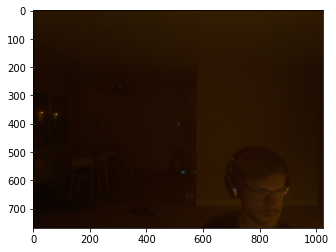

In [3]:
plt.imshow(rgb_arr)

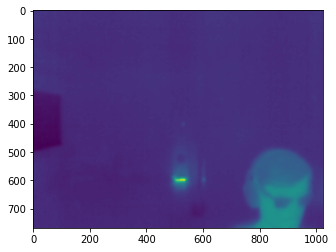

In [4]:
plt.imshow(ir_arr)

In [6]:
ir_arr

array([[28.43, 28.43, 28.43, ..., 27.61, 27.61, 27.61],
       [28.43, 28.43, 28.43, ..., 27.61, 27.61, 27.61],
       [28.43, 28.43, 28.43, ..., 27.61, 27.61, 27.61],
       ...,
       [27.59, 27.59, 27.59, ..., 27.38, 27.38, 27.38],
       [27.59, 27.59, 27.59, ..., 27.38, 27.38, 27.38],
       [27.59, 27.59, 27.59, ..., 27.38, 27.38, 27.38]], dtype=float32)